In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyspark as ps
import os

plt.style.use('ggplot')

In [2]:
spark = (ps.sql.SparkSession
        .builder
        .master('local[4]')
        .appName('capstone1')
        .getOrCreate()
        )
sc = spark.sparkContext

In [142]:
sc

<SparkContext master=local[4] appName=capstone1>

In [4]:
spark

In [5]:
from pyspark.sql.types import *

schema = StructType([
    StructField('ResponseID', StringType(), True),
    StructField('ExtendedSessionID', StringType(), True),
    StructField('UserID', StringType(), True),
    StructField('ScenarioOrder', IntegerType(), True),
    StructField('Intervention', IntegerType(), True),
    StructField('PedPed', IntegerType(), True),
    StructField('Barrier', IntegerType(), True),
    StructField('CrossingSignal', IntegerType(), True),
    StructField('AttributeLevel', StringType(), True),
    StructField('ScenarioTypeStrict', StringType(), True),
    StructField('ScenarioType', StringType(), True),
    StructField('DefaultChoice', StringType(), True),
    StructField('NonDefaultChoice', StringType(), True),
    StructField('DefaultChoiceOmission', IntegerType(), True),
    StructField('NumberOfCharacters', IntegerType(), True),
    StructField('DiffNumberOfCharacters', IntegerType(), True),
    StructField('Saved', IntegerType(), True),
    StructField('Template', StringType(), True),
    StructField('DescriptionShown', IntegerType(), True),
    StructField('LeftHand', IntegerType(), True),
    StructField('UserCountry3', StringType(), True),
    StructField('Man', IntegerType(), True),
    StructField('Woman', IntegerType(), True),
    StructField('Pregnant', IntegerType(), True),
    StructField('Stroller', IntegerType(), True),
    StructField('OldMan', IntegerType(), True),
    StructField('OldWoman', IntegerType(), True),
    StructField('Boy', IntegerType(), True),
    StructField('Girl', IntegerType(), True),
    StructField('Homeless', IntegerType(), True),
    StructField('LargeWoman', IntegerType(), True),
    StructField('LargeMan', IntegerType(), True),
    StructField('Criminal', IntegerType(), True),
    StructField('MaleExecutive', IntegerType(), True),
    StructField('FemaleExecutive', IntegerType(), True),
    StructField('FemaleAthlete', IntegerType(), True),
    StructField('MaleAthlete', IntegerType(), True),
    StructField('FemaleDoctore', IntegerType(), True),
    StructField('MaleDoctor', IntegerType(), True),
    StructField('Dog', IntegerType(), True),
    StructField('Cat', IntegerType(), True),  
])

In [6]:
df = spark.read.csv('./data/SharedResponses.csv', schema=schema, header=True)

In [7]:
df.printSchema()

root
 |-- ResponseID: string (nullable = true)
 |-- ExtendedSessionID: string (nullable = true)
 |-- UserID: string (nullable = true)
 |-- ScenarioOrder: integer (nullable = true)
 |-- Intervention: integer (nullable = true)
 |-- PedPed: integer (nullable = true)
 |-- Barrier: integer (nullable = true)
 |-- CrossingSignal: integer (nullable = true)
 |-- AttributeLevel: string (nullable = true)
 |-- ScenarioTypeStrict: string (nullable = true)
 |-- ScenarioType: string (nullable = true)
 |-- DefaultChoice: string (nullable = true)
 |-- NonDefaultChoice: string (nullable = true)
 |-- DefaultChoiceOmission: integer (nullable = true)
 |-- NumberOfCharacters: integer (nullable = true)
 |-- DiffNumberOfCharacters: integer (nullable = true)
 |-- Saved: integer (nullable = true)
 |-- Template: string (nullable = true)
 |-- DescriptionShown: integer (nullable = true)
 |-- LeftHand: integer (nullable = true)
 |-- UserCountry3: string (nullable = true)
 |-- Man: integer (nullable = true)
 |-- Wom

In [8]:
# df.count()

### Create SQL table 'mm'

In [9]:
df.createOrReplaceTempView('mm')

In [10]:
query = '''
SELECT *
FROM mm
LIMIT 10
'''

spark.sql(query).toPandas()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctore,MaleDoctor,Dog,Cat
0,2222bRQqBTZ6dLnPH,32757157_6999801415950060.0,6999801415950060,7,0,0,0,1,Fit,Fitness,...,0,0,0,0,1,2,0,0,0,0
1,2222sJk4DcoqXXi98,1043988516_3525281295.0,3525281295,2,0,0,0,0,Rand,Random,...,0,0,1,0,0,0,0,0,0,0
2,2223CNmvTr2Coj4wp,-1613944085_422160228641876.0,422160228641876,10,0,1,0,1,Female,Gender,...,0,0,0,1,0,0,0,0,0,0
3,2223Xu54ufgjcyMR3,1425316635_327833569077076.0,327833569077076,11,0,0,1,0,Old,Age,...,0,0,0,0,0,0,0,0,0,0
4,2223jMWDEGNeszivb,-1683127088_785070916172117.0,785070916172117,8,0,1,0,2,More,Utilitarian,...,0,1,1,0,1,0,0,0,1,0
5,22244vvSZfn4J9Zop,1525185249_1436495773909467.0,1436495773909470,11,0,0,1,0,Low,Social Status,...,0,0,0,0,0,0,0,0,0,0
6,2224H2QBFKNsMmRQc,1661661891_4304873273230329.0,4304873273230330,11,0,1,0,0,Female,Gender,...,0,0,0,1,0,0,1,0,0,0
7,2224YxTZcu4sJqTSD,-887960483_174929057557052.0,174929057557052,6,0,0,0,2,Hoomans,Species,...,0,0,0,0,1,1,0,0,0,0
8,2224g4ytARX4QT5rB,213978760_9992828917431898.0,9992828917431900,7,0,0,1,0,Less,Utilitarian,...,0,0,0,0,1,0,1,0,0,1
9,2224kBG72574tbZD3,737909459_839962439872333.0,839962439872333,12,0,0,1,0,Old,Age,...,0,0,0,0,0,0,0,0,0,0


In [11]:
query = '''
SELECT ScenarioType, DefaultChoice, count(*)
FROM mm
GROUP BY ScenarioType, DefaultChoice

'''

spark.sql(query).toPandas()

,ScenarioType,DefaultChoice,count(1)
0,Age,Young,11583880
1,Fitness,Fit,10811634
2,None,None,74
3,Utilitarian,More,12527288
4,Gender,Male,11967330
5,Random,None,7507350
6,Social Status,High,3890417
7,Species,Hoomans,12044382


### Move limited # of rows to a Pandas DF for EDA

In [12]:
pdf = df.limit(100_000).toPandas()

In [13]:
pdf.head()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctore,MaleDoctor,Dog,Cat
0,2222bRQqBTZ6dLnPH,32757157_6999801415950060.0,6999801415950060,7,0,0,0,1,Fit,Fitness,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2222sJk4DcoqXXi98,1043988516_3525281295.0,3525281295,2,0,0,0,0,Rand,Random,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2223CNmvTr2Coj4wp,-1613944085_422160228641876.0,422160228641876,10,0,1,0,1,Female,Gender,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2223Xu54ufgjcyMR3,1425316635_327833569077076.0,327833569077076,11,0,0,1,0,Old,Age,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2223jMWDEGNeszivb,-1683127088_785070916172117.0,785070916172117,8,0,1,0,2,More,Utilitarian,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [14]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseID              100000 non-null  object 
 1   ExtendedSessionID       100000 non-null  object 
 2   UserID                  99991 non-null   object 
 3   ScenarioOrder           100000 non-null  int32  
 4   Intervention            100000 non-null  int32  
 5   PedPed                  100000 non-null  int32  
 6   Barrier                 100000 non-null  int32  
 7   CrossingSignal          100000 non-null  int32  
 8   AttributeLevel          100000 non-null  object 
 9   ScenarioTypeStrict      100000 non-null  object 
 10  ScenarioType            99999 non-null   object 
 11  DefaultChoice           89462 non-null   object 
 12  NonDefaultChoice        89462 non-null   object 
 13  DefaultChoiceOmission   89462 non-null   float64
 14  NumberOfCharacters   

In [15]:
pdf.describe()

,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,DefaultChoiceOmission,NumberOfCharacters,DiffNumberOfCharacters,Saved,DescriptionShown,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctore,MaleDoctor,Dog,Cat
count,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,89462.000000,99999.000000,99999.000000,100000.00000,86891.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,6.741770,0.0,0.450480,0.215510,0.685410,0.492131,3.078281,0.570146,0.46393,0.274608,...,0.158432,0.059071,0.105701,0.106531,0.192102,0.189082,0.097831,0.096021,0.174862,0.172632
std,3.780925,0.0,0.497544,0.411178,0.856534,0.499941,1.468290,1.149558,0.49870,0.446319,...,0.444673,0.254876,0.345673,0.347424,0.523319,0.519744,0.335144,0.331123,0.571481,0.564407
min,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,0.0,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.000000,0.0,1.000000,1.000000,2.000000,1.000000,5.000000,4.000000,1.00000,1.000000,...,5.000000,3.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000


In [150]:
pdf_t = pdf.T
pdf_t

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
ResponseID,2222bRQqBTZ6dLnPH,2222sJk4DcoqXXi98,2223CNmvTr2Coj4wp,2223Xu54ufgjcyMR3,2223jMWDEGNeszivb,22244vvSZfn4J9Zop,2224H2QBFKNsMmRQc,2224YxTZcu4sJqTSD,2224g4ytARX4QT5rB,2224kBG72574tbZD3,...,2Aa4yQHuybLJqnwxq,2Aa559qdfx5KAG6sT,2Aa576dQ7Wpgum4MR,2Aa5K7sBTSTjyZiuQ,2Aa5jeQLoTpxwChyv,2Aa5oYEd5AheoukGD,2Aa5sLzhd77AxmD8y,2Aa5zkaQTZRy9fFd3,2Aa6FfWWXRxMDtEeT,2Aa6KG6dLaM5Nz8Ry
ExtendedSessionID,32757157_6999801415950060.0,1043988516_3525281295.0,-1613944085_422160228641876.0,1425316635_327833569077076.0,-1683127088_785070916172117.0,1525185249_1436495773909467.0,1661661891_4304873273230329.0,-887960483_174929057557052.0,213978760_9992828917431898.0,737909459_839962439872333.0,...,272857466_9443553518729876.0,377028720_2994263428108068.0,-627630413_221834613,-2140560613_3244727915117772.0,1743830679_862007731824977.0,1898432267_2202710798.0,1320057909_31834060,-592541994_8792767696173434.0,-1208573378_3445518202715891.0,-1557719956_4249654164.0
UserID,6999801415950060,3525281295,422160228641876,327833569077076,785070916172117,1436495773909470,4304873273230330,174929057557052,9992828917431900,839962439872333,...,9443553518729880,2994263428108070,221834613,3244727915117770,862007731824977,2202710798,31834060,8792767696173440,3445518202715890,4249654164
ScenarioOrder,7,2,10,11,8,11,11,6,7,12,...,13,13,11,11,1,10,4,9,1,2
Intervention,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PedPed,0,0,1,0,1,0,1,0,0,0,...,1,0,0,0,1,0,1,1,1,0
Barrier,0,0,0,1,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
CrossingSignal,1,0,1,0,2,0,0,2,0,0,...,2,1,0,1,2,0,0,0,2,2
AttributeLevel,Fit,Rand,Female,Old,More,Low,Female,Hoomans,Less,Old,...,Fat,High,Old,Pets,Fat,Hoomans,Male,Hoomans,Old,Old
ScenarioTypeStrict,Fitness,Random,Gender,Age,Utilitarian,Social Status,Gender,Species,Utilitarian,Age,...,Fitness,Social Status,Age,Species,Fitness,Species,Gender,Species,Age,Age


In [148]:
response = pdf_t[0]['ResponseID']
response

'2222bRQqBTZ6dLnPH'

In [152]:
user = pdf_t[0]['UserID']
user

'6999801415950060'

In [190]:
pdf[pdf['ResponseID']==response]

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,ScenarioType,DefaultChoice,NonDefaultChoice,DefaultChoiceOmission,NumberOfCharacters,DiffNumberOfCharacters,Saved,Template,DescriptionShown,LeftHand,UserCountry3,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctore,MaleDoctor,Dog,Cat
0,2222bRQqBTZ6dLnPH,32757157_6999801415950060.0,6999801415950060,7,0,0,0,1,Fit,Fitness,Fitness,Fit,Fat,1.0,5.0,0.0,1,Desktop,1.0,1.0,USA,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0


In [153]:
pdf[pdf['UserID']==user]

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctore,MaleDoctor,Dog,Cat
0,2222bRQqBTZ6dLnPH,32757157_6999801415950060.0,6999801415950060,7,0,0,0,1,Fit,Fitness,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0


In [155]:
pdf_survey[pdf_survey['UserID']==user]

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,Template,DescriptionShown,LeftHand,UserCountry3,Review_age,Review_education,Review_gender,Review_income,Review_political,Review_religious


## Survey data

In [16]:
survey_schema = StructType([
    StructField('ResponseID', StringType(), True),
    StructField('ExtendedSessionID', StringType(), True),
    StructField('UserID', StringType(), True),
    StructField('ScenarioOrder', IntegerType(), True),
    StructField('Intervention', IntegerType(), True),
    StructField('PedPed', IntegerType(), True),
    StructField('Barrier', IntegerType(), True),
    StructField('CrossingSignal', IntegerType(), True),
    StructField('AttributeLevel', StringType(), True),
    StructField('ScenarioTypeStrict', StringType(), True),
    StructField('ScenarioType', StringType(), True),
    StructField('DefaultChoice', StringType(), True),
    StructField('NonDefaultChoice', StringType(), True),
    StructField('DefaultChoiceOmission', IntegerType(), True),
    StructField('NumberOfCharacters', IntegerType(), True),
    StructField('DiffNumberOfCharacters', IntegerType(), True),
    StructField('Saved', IntegerType(), True),
    StructField('Template', StringType(), True),
    StructField('DescriptionShown', IntegerType(), True),
    StructField('LeftHand', IntegerType(), True),
    StructField('UserCountry3', StringType(), True),
    StructField('Review_age', IntegerType(), True),
    StructField('Review_education', StringType(), True),
    StructField('Review_gender', StringType(), True),
    StructField('Review_income', IntegerType(), True),
    StructField('Review_political', IntegerType(), True),
    StructField('Review_religious', IntegerType(), True),
])

In [17]:
df_survey = spark.read.csv('./data/SharedResponsesSurvey.csv', schema=survey_schema, header=True)

In [18]:
df_survey.printSchema()

root
 |-- ResponseID: string (nullable = true)
 |-- ExtendedSessionID: string (nullable = true)
 |-- UserID: string (nullable = true)
 |-- ScenarioOrder: integer (nullable = true)
 |-- Intervention: integer (nullable = true)
 |-- PedPed: integer (nullable = true)
 |-- Barrier: integer (nullable = true)
 |-- CrossingSignal: integer (nullable = true)
 |-- AttributeLevel: string (nullable = true)
 |-- ScenarioTypeStrict: string (nullable = true)
 |-- ScenarioType: string (nullable = true)
 |-- DefaultChoice: string (nullable = true)
 |-- NonDefaultChoice: string (nullable = true)
 |-- DefaultChoiceOmission: integer (nullable = true)
 |-- NumberOfCharacters: integer (nullable = true)
 |-- DiffNumberOfCharacters: integer (nullable = true)
 |-- Saved: integer (nullable = true)
 |-- Template: string (nullable = true)
 |-- DescriptionShown: integer (nullable = true)
 |-- LeftHand: integer (nullable = true)
 |-- UserCountry3: string (nullable = true)
 |-- Review_age: integer (nullable = true)
 

In [19]:
df_survey.count()

11286141

## Survey data to SQL table

In [156]:
df_survey.createOrReplaceTempView('survey')

In [157]:
query = '''
SELECT *
FROM survey
LIMIT 10
'''

spark.sql(query).toPandas()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,Template,DescriptionShown,LeftHand,UserCountry3,Review_age,Review_education,Review_gender,Review_income,Review_political,Review_religious
0,3ubu5Minm7ygqK3oa,-2147481563_6968366610050747.0,6968366610050750,13,0,0,0,0,Female,Gender,...,Desktop,0,0,RUS,32,bachelor,male,35000,NaN,NaN
1,FKd9Fje2tWt2sHi6v,-2147481563_6968366610050747.0,6968366610050750,8,0,1,0,0,Fat,Fitness,...,Desktop,0,0,RUS,32,bachelor,male,35000,NaN,NaN
2,J6WRHLj8exr4bNwTm,-2147481563_6968366610050747.0,6968366610050750,2,0,0,0,2,Young,Age,...,Desktop,0,1,RUS,32,bachelor,male,35000,NaN,NaN
3,KcYXwqS3rTrbqdTY2,-2147481563_6968366610050747.0,6968366610050750,1,0,1,0,2,Pets,Species,...,Desktop,0,1,RUS,32,bachelor,male,35000,NaN,NaN
4,ZQsAWst58jK9HcKvx,-2147481563_6968366610050747.0,6968366610050750,5,0,1,0,0,Fit,Fitness,...,Desktop,0,1,RUS,32,bachelor,male,35000,NaN,NaN
5,m4c66qhwmnqcCzxdX,-2147481563_6968366610050747.0,6968366610050750,4,0,0,0,1,Rand,Random,...,Desktop,0,0,RUS,32,bachelor,male,35000,NaN,NaN
6,nej5j6wM9YmiGHgA7,-2147481563_6968366610050747.0,6968366610050750,6,0,0,0,1,More,Utilitarian,...,Desktop,0,1,RUS,32,bachelor,male,35000,NaN,NaN
7,np7BxSz2LhNqXMAHj,-2147481563_6968366610050747.0,6968366610050750,3,0,1,0,0,Old,Age,...,Desktop,0,1,RUS,32,bachelor,male,35000,NaN,NaN
8,sibXCK6jno3M94BnR,-2147481563_6968366610050747.0,6968366610050750,12,0,1,0,1,Hoomans,Species,...,Desktop,0,1,RUS,32,bachelor,male,35000,NaN,NaN
9,w6kv36ap7rPR6FT4N,-2147481563_6968366610050747.0,6968366610050750,10,0,1,0,0,Low,Social Status,...,Desktop,0,0,RUS,32,bachelor,male,35000,NaN,NaN


In [164]:
query = '''
    SELECT *
    FROM mm m
    JOIN survey s ON m.ResponseID = s.ResponseID
    WHERE m.UserCountry3 = 'HUN'
    ORDER BY m.UserID, m.ResponseID, m.ScenarioOrder
    '''

hun = spark.sql(query).toPandas()

In [187]:
hun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436787 entries, 0 to 436786
Data columns (total 68 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseID              436787 non-null  object 
 1   ExtendedSessionID       436787 non-null  object 
 2   UserID                  436787 non-null  object 
 3   ScenarioOrder           436787 non-null  int32  
 4   Intervention            436787 non-null  int32  
 5   PedPed                  436787 non-null  int32  
 6   Barrier                 436787 non-null  int32  
 7   CrossingSignal          436787 non-null  int32  
 8   AttributeLevel          436787 non-null  object 
 9   ScenarioTypeStrict      436787 non-null  object 
 10  ScenarioType            436787 non-null  object 
 11  DefaultChoice           389491 non-null  object 
 12  NonDefaultChoice        389491 non-null  object 
 13  DefaultChoiceOmission   389491 non-null  float64
 14  NumberOfCharacters  

In [189]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 68)
hun.head(30)

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,ScenarioType,DefaultChoice,NonDefaultChoice,DefaultChoiceOmission,NumberOfCharacters,DiffNumberOfCharacters,Saved,Template,DescriptionShown,LeftHand,UserCountry3,Man,Woman,Pregnant,Stroller,OldMan,OldWoman,Boy,Girl,Homeless,LargeWoman,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctore,MaleDoctor,Dog,Cat,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,ScenarioType,DefaultChoice,NonDefaultChoice,DefaultChoiceOmission,NumberOfCharacters,DiffNumberOfCharacters,Saved,Template,DescriptionShown,LeftHand,UserCountry3,Review_age,Review_education,Review_gender,Review_income,Review_political,Review_religious
0,3tvz2A8y8ynQG6GrH,985012019_1000020414122555.0,1000020414122560,1,1,1,0,2,Low,Social Status,Social Status,High,Low,1.0,4,0,0,Desktop,1,0,HUN,NaN,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,3tvz2A8y8ynQG6GrH,985012019_1000020414122555.0,1000020414122560,1,1,1,0,2,Low,Social Status,Social Status,High,Low,1.0,4,0,0,Desktop,1,0,HUN,26.0,bachelor,male,5000.0,NaN,NaN
1,9uKk5o8Ft335ucjse,985012019_1000020414122555.0,1000020414122560,11,0,0,0,0,Hoomans,Species,Species,Hoomans,Pets,1.0,2,0,1,Desktop,0,0,HUN,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,9uKk5o8Ft335ucjse,985012019_1000020414122555.0,1000020414122560,11,0,0,0,0,Hoomans,Species,Species,Hoomans,Pets,1.0,2,0,1,Desktop,0,0,HUN,26.0,bachelor,male,5000.0,NaN,NaN
2,9uKk5o8Ft335ucjse,985012019_1000020414122555.0,1000020414122560,11,0,0,0,0,Hoomans,Species,Species,Hoomans,Pets,1.0,2,0,1,Desktop,0,0,HUN,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,9uKk5o8Ft335ucjse,985012019_1000020414122555.0,1000020414122560,11,1,0,1,0,Pets,Species,Species,Hoomans,Pets,1.0,2,0,0,Desktop,0,1,HUN,26.0,bachelor,male,5000.0,NaN,NaN
3,9uKk5o8Ft335ucjse,985012019_1000020414122555.0,1000020414122560,11,1,0,1,0,Pets,Species,Species,Hoomans,Pets,1.0,2,0,0,Desktop,0,1,HUN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,9uKk5o8Ft335ucjse,985012019_1000020414122555.0,1000020414122560,11,0,0,0,0,Hoomans,Species,Species,Hoomans,Pets,1.0,2,0,1,Desktop,0,0,HUN,26.0,bachelor,male,5000.0,NaN,NaN
4,9uKk5o8Ft335ucjse,985012019_1000020414122555.0,1000020414122560,11,1,0,1,0,Pets,Species,Species,Hoomans,Pets,1.0,2,0,0,Desktop,0,1,HUN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,9uKk5o8Ft335ucjse,985012019_1000020414122555.0,1000020414122560,11,1,0,1,0,Pets,Species,Species,Hoomans,Pets,1.0,2,0,0,Desktop,0,1,HUN,26.0,bachelor,male,5000.0,NaN,NaN
5,JHB3zMXojgkebqi4t,985012019_1000020414122555.0,1000020414122560,7,0,0,1,0,Old,Age,Age,Young,Old,0.0,4,0,0,Desktop,1,1,HUN,NaN,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,JHB3zMXojgkebqi4t,985012019_1000020414122555.0,1000020414122560,7,0,0,1,0,Old,Age,Age,Young,Old,0.0,4,0,0,Desktop,1,1,HUN,26.0,bachelor,male,5000.0,NaN,NaN
6,JHB3zMXojgkebqi4t,985012019_1000020414122555.0,1000020414122560,7,0,0,1,0,Old,Age,Age,Young,Old,0.0,4,0,0,Desktop,1,1,HUN,NaN,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,JHB3zMXojgkebqi4t,985012019_1000020414122555.0,1000020414122560,7,1,0,0,0,Young,Age,Age,Young,Old,0.0,4,0,1,Desktop,0,0,HUN,26.0,bachelor,male,5000.0,NaN,NaN
7,JHB3zMXojgkebqi4t,985012019_1000020414122555.0,1000020414122560,7,1,0,0,0,Young,Age,Age,Young,Old,0.0,4,0,1,Desktop,0,0,HUN,NaN,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,JHB3zMXojgkebqi4t,985012019_1000020414122555.0,1000020414122560,7,0,0,1,0,Old,Age,Age,Young,Old,0.0,4,0,0,Desktop,1,1,HUN,26.0,bachelor,male,5000.0,NaN,NaN
8,JHB3zMXojgkebqi4t,985012019_1000020414122555.0,1000020414122560,7,1,0,0,0,Young,Age,Age,Young,Old,0.0,4,0,1,Desktop,0,0,HUN,NaN,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,JHB3zMXojgkebqi4t,985012019_1000020414122555.0,1000020414122560,7,1,0,0,0,Young,Age,Age,Young,Old,0.0,4,0,1,Desktop,0,0,HUN,26.0,bachelor,male,5000.0,NaN,NaN
9,PxLG6GmXfdcu5sii2,985012019_1000020414122555.0,1000020414122560,10,0,1,0,1,Rand,Fitness,R

## Move 100k rows to Pandas

In [20]:
pdf_survey = df_survey.limit(100_000).toPandas()

In [21]:
pdf_survey.head()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,Template,DescriptionShown,LeftHand,UserCountry3,Review_age,Review_education,Review_gender,Review_income,Review_political,Review_religious
0,3ubu5Minm7ygqK3oa,-2147481563_6968366610050747.0,6968366610050750,13,0,0,0,0,Female,Gender,...,Desktop,0,0,RUS,32.0,bachelor,male,35000.0,NaN,NaN
1,FKd9Fje2tWt2sHi6v,-2147481563_6968366610050747.0,6968366610050750,8,0,1,0,0,Fat,Fitness,...,Desktop,0,0,RUS,32.0,bachelor,male,35000.0,NaN,NaN
2,J6WRHLj8exr4bNwTm,-2147481563_6968366610050747.0,6968366610050750,2,0,0,0,2,Young,Age,...,Desktop,0,1,RUS,32.0,bachelor,male,35000.0,NaN,NaN
3,KcYXwqS3rTrbqdTY2,-2147481563_6968366610050747.0,6968366610050750,1,0,1,0,2,Pets,Species,...,Desktop,0,1,RUS,32.0,bachelor,male,35000.0,NaN,NaN
4,ZQsAWst58jK9HcKvx,-2147481563_6968366610050747.0,6968366610050750,5,0,1,0,0,Fit,Fitness,...,Desktop,0,1,RUS,32.0,bachelor,male,35000.0,NaN,NaN


In [22]:
pdf_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseID              100000 non-null  object 
 1   ExtendedSessionID       100000 non-null  object 
 2   UserID                  100000 non-null  object 
 3   ScenarioOrder           100000 non-null  int32  
 4   Intervention            100000 non-null  int32  
 5   PedPed                  100000 non-null  int32  
 6   Barrier                 100000 non-null  int32  
 7   CrossingSignal          100000 non-null  int32  
 8   AttributeLevel          100000 non-null  object 
 9   ScenarioTypeStrict      100000 non-null  object 
 10  ScenarioType            100000 non-null  object 
 11  DefaultChoice           89408 non-null   object 
 12  NonDefaultChoice        89408 non-null   object 
 13  DefaultChoiceOmission   89408 non-null   float64
 14  NumberOfCharacters   

In [23]:
pdf_survey.describe()

,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,DefaultChoiceOmission,NumberOfCharacters,DiffNumberOfCharacters,Saved,DescriptionShown,LeftHand,Review_age,Review_income,Review_political,Review_religious
count,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,89408.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,8.831000e+04,39890.000000,19427.000000,44707.000000
mean,6.996900,0.0,0.452250,0.215570,0.687470,0.488782,3.082340,0.576780,0.459120,0.367880,0.539710,1.244872e+03,28390.824768,0.739589,0.101394
std,3.741394,0.0,0.497717,0.411219,0.857124,0.499877,1.462505,1.155421,0.498329,0.482231,0.498423,1.014213e+05,21504.906541,0.438870,0.301852
min,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-9.300000e+01,5000.000000,0.000000,0.000000
25%,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.700000e+01,10000.000000,0.000000,0.000000
50%,7.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.200000e+01,25000.000000,1.000000,0.000000
75%,10.000000,0.0,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,2.900000e+01,50000.000000,1.000000,0.000000
max,13.000000,0.0,1.000000,1.000000,2.000000,1.000000,5.000000,4.000000,1.000000,1.000000,1.000000,8.698686e+06,80000.000000,1.000000,1.000000


In [24]:
pdf_survey.head(100)

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,Template,DescriptionShown,LeftHand,UserCountry3,Review_age,Review_education,Review_gender,Review_income,Review_political,Review_religious
0,3ubu5Minm7ygqK3oa,-2147481563_6968366610050747.0,6968366610050750,13,0,0,0,0,Female,Gender,...,Desktop,0,0,RUS,32.0,bachelor,male,35000.0,NaN,NaN
1,FKd9Fje2tWt2sHi6v,-2147481563_6968366610050747.0,6968366610050750,8,0,1,0,0,Fat,Fitness,...,Desktop,0,0,RUS,32.0,bachelor,male,35000.0,NaN,NaN
2,J6WRHLj8exr4bNwTm,-2147481563_6968366610050747.0,6968366610050750,2,0,0,0,2,Young,Age,...,Desktop,0,1,RUS,32.0,bachelor,male,35000.0,NaN,NaN
3,KcYXwqS3rTrbqdTY2,-2147481563_6968366610050747.0,6968366610050750,1,0,1,0,2,Pets,Species,...,Desktop,0,1,RUS,32.0,bachelor,male,35000.0,NaN,NaN
4,ZQsAWst58jK9HcKvx,-2147481563_6968366610050747.0,6968366610050750,5,0,1,0,0,Fit,Fitness,...,Desktop,0,1,RUS,32.0,bachelor,male,35000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,BvaDuoe8sP5MNAPFy,-2147375306_1833363285875471.0,1833363285875470,6,0,1,0,2,Old,Age,...,Desktop,0,1,ESP,30.0,vocational,male,25000.0,NaN,0.0
96,Q48DsiEgSkA2o6qCN,-2147375306_1833363285875471.0,1833363285875470,7,0,1,0,1,Female,Gender,...,Desktop,0,0,ESP,30.0,vocational,male,25000.0,NaN,0.0
97,W2hZwB39823LJGMcM,-2147375306_1833363285875471.0,1833363285875470,1,0,1,0,2,Fat,Fitness,...,Desktop,1,1,ESP,30.0,vocational,male,25000.0,NaN,0.0
98,W97uxsAe9hEznriwx,-2147375306_1833363285875471.0,1833363285875470,3,0,0,0,1,Male,Gender,...,Desktop,1,1,ESP,30.0,vocational,male,25000.0,NaN,0.0


In [25]:
pdf_survey.groupby('UserCountry3').count()['ResponseID'].sort_values()

UserCountry3
IMN        9
PRK        9
LKA       10
KGZ       11
KEN       11
       ...  
GBR     5986
DEU     6461
FRA     8165
BRA    11235
USA    21233
Name: ResponseID, Length: 125, dtype: int64

In [26]:
pd.crosstab(pdf_survey['Review_education'], pdf_survey['Review_income'])

Review_income,5000.0,10000.0,15000.0,25000.0,35000.0,50000.0,80000.0
Review_education,,,,,,,
bachelor,1840,1432,1663,1565,2101,2762,892
college,1379,941,1098,802,734,703,359
default,12,33,33,13,0,72,19
graduate,885,1055,1503,1593,2173,2363,1188
high,1490,885,1094,800,614,513,325
others,221,182,194,135,149,164,148
underHigh,606,326,252,182,141,180,128
vocational,265,270,439,352,340,212,70


In [27]:
pdf_survey.groupby('Review_gender').count()[['UserID']]

,UserID
Review_gender,
default,9445
female,24921
male,63579
others,2055


In [28]:
pdf_survey.T

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
ResponseID,3ubu5Minm7ygqK3oa,FKd9Fje2tWt2sHi6v,J6WRHLj8exr4bNwTm,KcYXwqS3rTrbqdTY2,ZQsAWst58jK9HcKvx,m4c66qhwmnqcCzxdX,nej5j6wM9YmiGHgA7,np7BxSz2LhNqXMAHj,sibXCK6jno3M94BnR,w6kv36ap7rPR6FT4N,...,uojvbdYtS4e4aoAW3,zr7bawfrnHAL67qA7,Bu552HL88kpi48TPJ,Ds7s6HHXKEooXhmij,bmtnabfk94mzpqD3W,eBWPY6QgEw9mi74iz,hhsst96bKPgZq5eHY,nTjKNCybGvrNvQjG7,oGjNNC2r29idZotX2,pTgDnmfWgWkDAXKJq
ExtendedSessionID,-2147481563_6968366610050747.0,-2147481563_6968366610050747.0,-2147481563_6968366610050747.0,-2147481563_6968366610050747.0,-2147481563_6968366610050747.0,-2147481563_6968366610050747.0,-2147481563_6968366610050747.0,-2147481563_6968366610050747.0,-2147481563_6968366610050747.0,-2147481563_6968366610050747.0,...,-2071392237_4194287986913154.0,-2071392237_4194287986913154.0,-2071377242_8044252751622308.0,-2071377242_8044252751622308.0,-2071377242_8044252751622308.0,-2071377242_8044252751622308.0,-2071377242_8044252751622308.0,-2071377242_8044252751622308.0,-2071377242_8044252751622308.0,-2071377242_8044252751622308.0
UserID,6968366610050750,6968366610050750,6968366610050750,6968366610050750,6968366610050750,6968366610050750,6968366610050750,6968366610050750,6968366610050750,6968366610050750,...,4194287986913150,4194287986913150,8044252751622310,8044252751622310,8044252751622310,8044252751622310,8044252751622310,8044252751622310,8044252751622310,8044252751622310
ScenarioOrder,13,8,2,1,5,4,6,3,12,10,...,6,12,12,7,1,6,3,8,13,10
Intervention,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PedPed,0,1,0,1,1,0,0,1,1,1,...,1,1,1,0,1,1,0,0,0,0
Barrier,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
CrossingSignal,0,0,2,2,0,1,1,0,1,0,...,2,0,0,0,1,0,0,0,2,0
AttributeLevel,Female,Fat,Young,Pets,Fit,Rand,More,Old,Hoomans,Low,...,Pets,Fat,Old,Fit,Less,Pets,Pets,Rand,Female,Fat
ScenarioTypeStrict,Gender,Fitness,Age,Species,Fitness,Random,Utilitarian,Age,Species,Social Status,...,Species,Fitness,Age,Fitness,Utilitarian,Species,Species,Random,Gender,Fitness


## EDA

In [91]:
# scenarios = pdf_survey.ScenarioType.unique()
scen_count = pdf_survey.groupby('ScenarioType').count()['ResponseID'].sort_values(ascending=False)

# strict_scenarios = pdf_survey.ScenarioTypeStrict.unique()
str_scen_count = pdf_survey.groupby('ScenarioTypeStrict').count()['ResponseID'].sort_values(ascending=False)

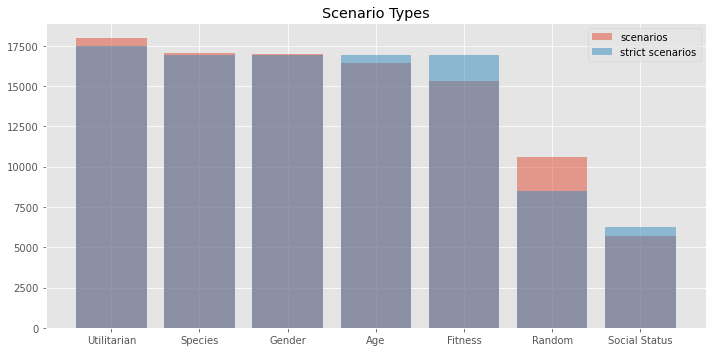

In [141]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(scen_count.index, scen_count, label='scenarios', alpha=0.5)
ax.bar(str_scen_count.index, str_scen_count, label='strict scenarios', alpha=0.5)
ax.legend()
ax.set_title('Scenario Types')
fig.tight_layout()

In [139]:
country_count = pdf_survey.groupby('UserCountry3').count()['ResponseID'].sort_values(ascending=False)
colors = ['grey' for c in range(20)]
colors[0] = 'b'
colors[12] = 'g'

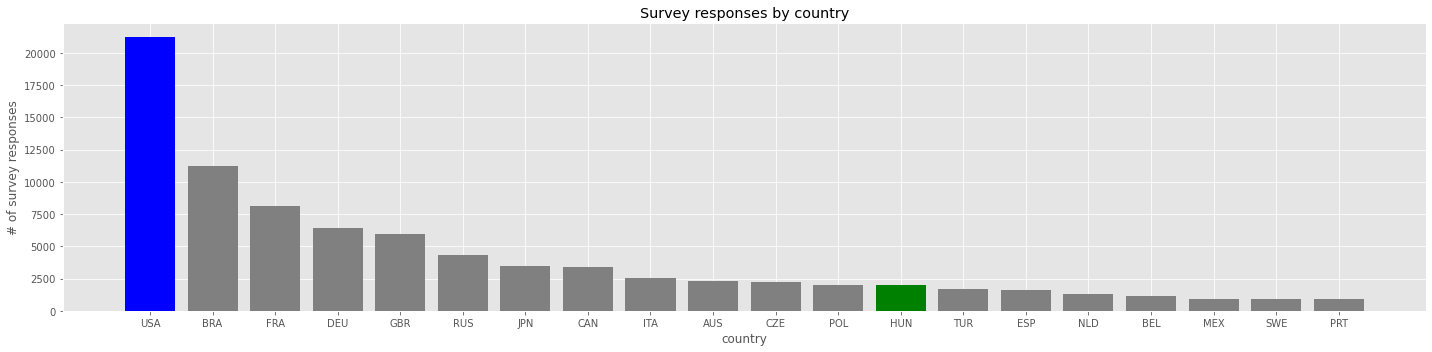

In [144]:
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(country_count.index[:20], country_count[:20], color=colors)
ax.set_title('Survey responses by country')
ax.set_ylabel('# of survey responses')
ax.set_xlabel('country')
fig.tight_layout()

In [197]:
education = pdf_survey.groupby('Review_education').count()['ResponseID'].sort_values(ascending=False)
education

Review_education
bachelor      19101
graduate      16632
high          16076
underHigh     14297
college       13015
default       11882
others         5653
vocational     3344
Name: ResponseID, dtype: int64

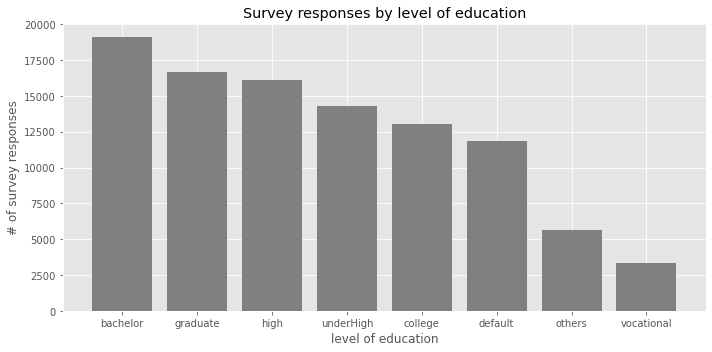

In [201]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(education.index, education, color='grey')
ax.set_title('Survey responses by level of education')
ax.set_ylabel('# of survey responses')
ax.set_xlabel('level of education')
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(education.index, education, color='grey')
ax.set_title('Age of respondentsses by level of education')
ax.set_ylabel('# of survey responses')
ax.set_xlabel('level of education')
fig.tight_layout()

In [202]:
device_used = pdf_survey.groupby('Template').count()['ResponseID'].sort_values(ascending=False)
device_used

Template
Desktop    75148
Mobile     24852
Name: ResponseID, dtype: int64

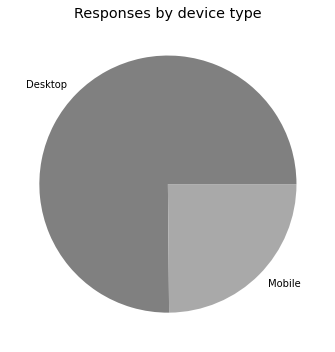

In [218]:
fig, ax = plt.subplots(figsize=(20,5))
ax.pie(device_used, labels=device_used.index, colors=['grey','darkgrey'])
ax.set_title('Responses by device type')
fig.tight_layout()

In [194]:
scenario_type = pdf_survey.groupby('ScenarioType')['DefaultChoiceOmission'].mean()
scenario_type

ScenarioType
Age              0.477475
Fitness          0.448220
Gender           0.499735
Random                NaN
Social Status    0.546770
Species          0.497504
Utilitarian      0.496832
Name: DefaultChoiceOmission, dtype: float64

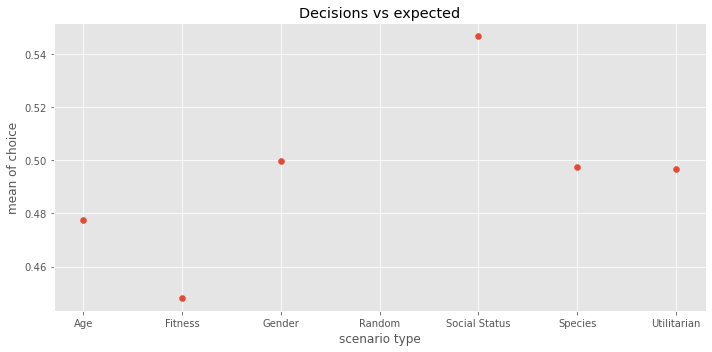

In [196]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(scenario_type.index, scenario_type, )
ax.set_title('Decisions vs expected')
ax.set_ylabel('mean of choice')
ax.set_xlabel('scenario type')
fig.tight_layout()

## Altair world map

In [51]:
import altair as alt
from vega_datasets import data

source = alt.topo_feature(data.world_110m.url, 'countries')
base = alt.Chart(source).mark_geoshape(
    fill='#666666',
    stroke='white'
).properties(
    width=600,
    height=300
)

# projections = ['equirectangular', 'mercator', 'orthographic', 'gnomonic']
# charts = [base.project(proj).properties(title=proj)
#           for proj in projections]
chart = base.project('equalEarth').properties(title='World map')

alt.concat(chart)

alt.ConcatChart(...)